In [1]:
# Importando bibliotecas
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import colorsys
from PIL import Image

uint8
(160, 256, 3)


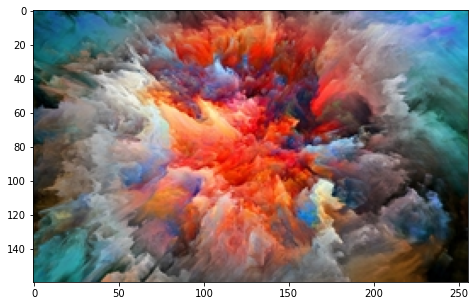

In [2]:
# Carregando a imagem
imagem = image.imread('imagens/explosão_de_cores.jpg')

# Analisando suas dimensões
print(imagem.dtype)
print(imagem.shape)

# Mostrando a imagem
plt.figure(figsize = (8, 5))
plt.imshow(imagem)
plt.show()

In [3]:
# Convertendo imagem para matriz RGB
data = np.asarray(imagem)
print(type(data))

# Dimensões dos dados
print(data.shape)

# Canal vermelho
print(data[..., 0])

<class 'numpy.ndarray'>
(160, 256, 3)
[[23 26 11 ... 43 35 30]
 [15 20 13 ... 41 40 35]
 [12  9  5 ... 28 27 23]
 ...
 [20 26 24 ... 12 10 10]
 [20 26 20 ...  9  8  7]
 [18 16 19 ...  6  7  7]]


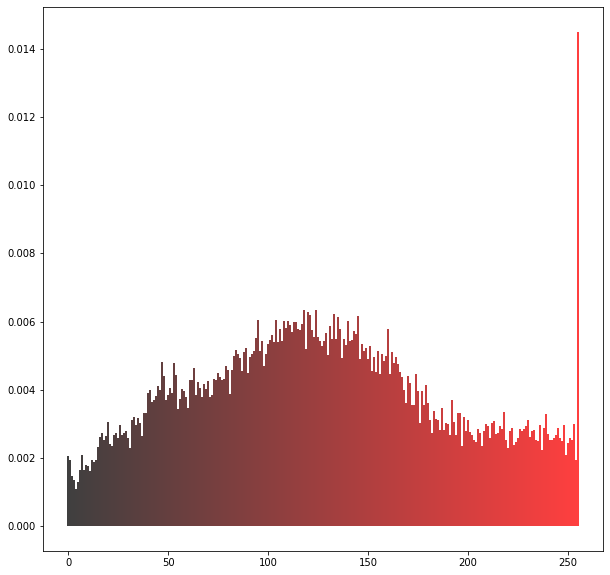

In [4]:
# Contrução do canal vermelho
vermelho = data[..., 0].flatten()
contagem_vermelho = np.bincount(vermelho)

plt.figure(figsize = (10.05, 10))

for i in range(len(contagem_vermelho)):
    plt.vlines(x = i, ymin = 0, ymax = contagem_vermelho[i]/(160*256), colors = (i/255, 0, 0))

plt.show()

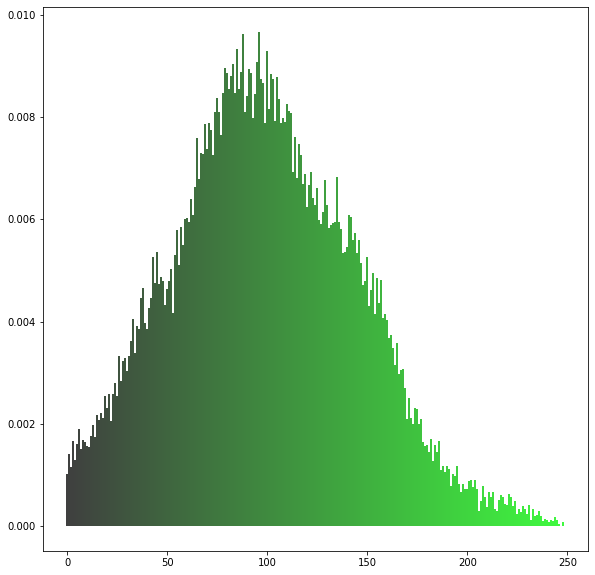

In [5]:
# Contrução do canal verde
verde = data[..., 1].flatten()
contagem_verde = np.bincount(verde)

plt.figure(figsize = (9.78, 10))

for i in range(len(contagem_verde)):
    plt.vlines(x = i, ymin = 0, ymax = contagem_verde[i]/(160*256), colors = (0, i/255, 0))

plt.show()

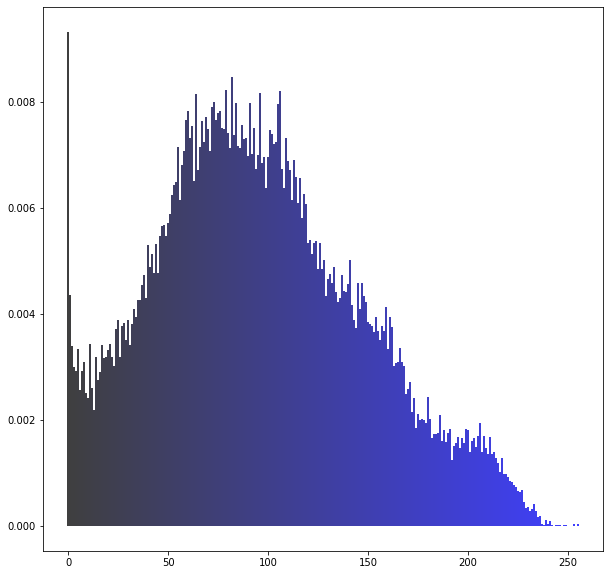

In [6]:
# Contrução do canal azul
azul = data[..., 2].flatten()
contagem_azul = np.bincount(azul)

plt.figure(figsize = (10.05, 10))

for i in range(len(contagem_azul)):
    plt.vlines(x = i, ymin = 0, ymax = contagem_azul[i]/(160*256), colors = (0, 0, i/255))

plt.show()

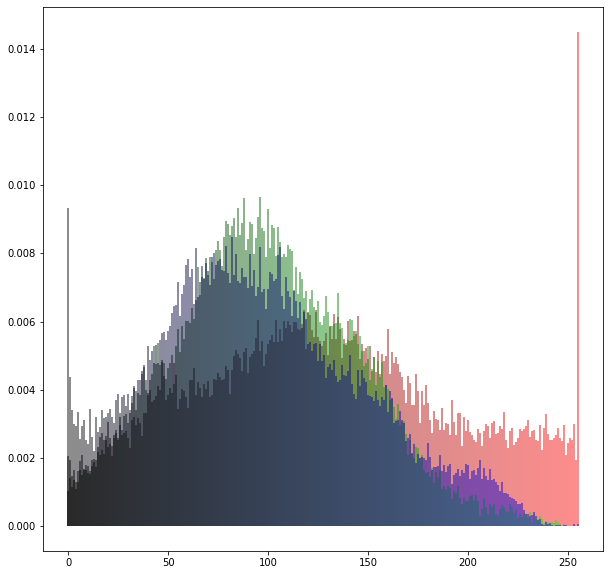

In [24]:
# Junção dos canais
plt.figure(figsize = (10.05, 10))

for i in range(len(contagem_vermelho)):
    plt.vlines(x = i, ymin = 0, ymax = contagem_vermelho[i]/(160*256), colors = (i/255, 0, 0, 0.6))

for i in range(len(contagem_verde)):
    plt.vlines(x = i, ymin = 0, ymax = contagem_verde[i]/(160*256), colors = (0, i/255, 0, 0.6))

for i in range(len(contagem_azul)):
    plt.vlines(x = i, ymin = 0, ymax = contagem_azul[i]/(160*256), colors = (0, 0, i/255, 0.6))

plt.show()    

In [7]:
# Converção de RGB para HSL (no caso aqui a função faz sendo HLS)
h = np.array([])
l = np.array([])
s = np.array([])

for i in range(len(vermelho)):
    h = np.append(arr = h, values = colorsys.rgb_to_hls(vermelho[i]/255, verde[i]/255, azul[i]/255)[0])
    l = np.append(arr = l, values = colorsys.rgb_to_hls(vermelho[i]/255, verde[i]/255, azul[i]/255)[1])
    s = np.append(arr = s, values = colorsys.rgb_to_hls(vermelho[i]/255, verde[i]/255, azul[i]/255)[2])


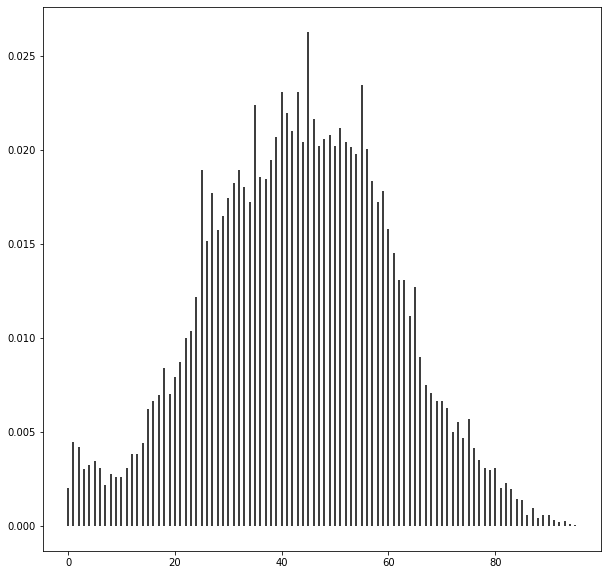

In [8]:
# Canal de luminância do HSL
contagem_luminanca = np.bincount((l*100).round().astype('uint8').flatten())

plt.figure(figsize = (10, 10))

for i in range(len(contagem_luminanca)):
    plt.vlines(x = i, ymin = 0, ymax = contagem_luminanca[i]/(160*256), colors = "black")

plt.show()

In [9]:
# Convertendo imagem para escala cinza
imagem_cinza = Image.open('imagens/explosão_de_cores.jpg').convert('L')

# Transformando em um array
imagem_cinza = np.asarray(imagem_cinza)

In [10]:
# Histograma
contagem_cinza = imagem_cinza.flatten()
contagem_cinza = np.bincount(contagem_cinza)

imagem_cinza.shape

(160, 256)

In [11]:
# Cálculo do CDF
cdf = np.cumsum(contagem_cinza)

cdf_f = (cdf - cdf.min())*255/(cdf.max()-cdf.min())

In [12]:
nova_imagem = cdf_f[imagem_cinza]

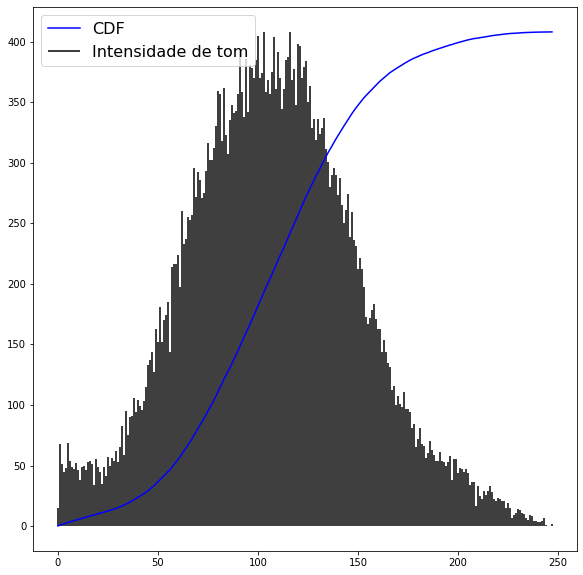

In [27]:
# Histograma da imagem cinza + plot CDF
plt.figure(figsize = (9.74, 10))

cdf_normalized = cdf * float(contagem_cinza.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')

for i in range(len(contagem_cinza)):
    plt.vlines(x = i, ymin = 0, ymax = contagem_cinza[i], colors = "black")

plt.legend(('CDF','Intensidade de tom'), loc = 'upper left', prop={"size":16})
plt.show()

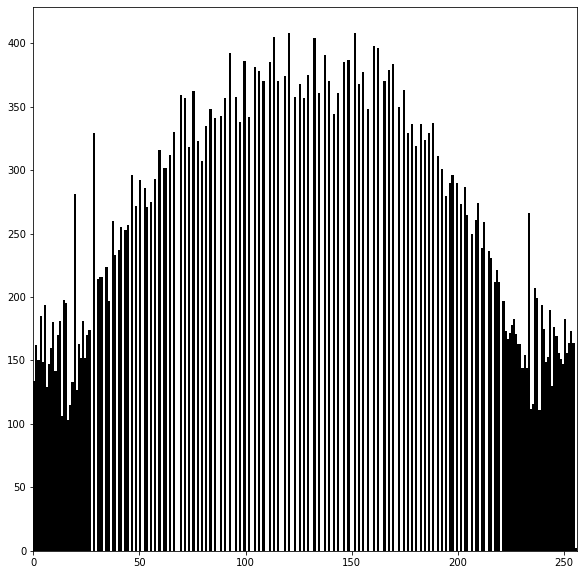

In [14]:
# Equalização
plt.figure(figsize = (9.74, 10))
plt.hist(nova_imagem.flatten(),256,[0,256], color = "Black")
plt.xlim([0,256])
plt.show()

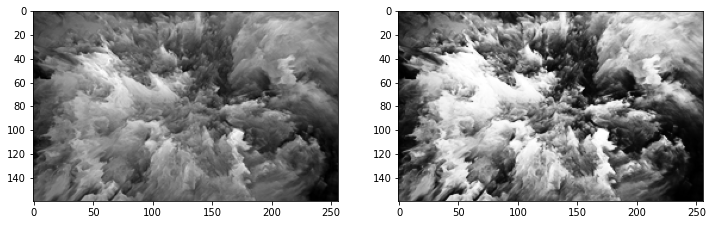

In [15]:
# Comparação
f, ax = plt.subplots(1,2, figsize=(12,8))
ax[0].imshow(imagem_cinza, cmap="gray")
ax[1].imshow(nova_imagem, cmap="gray")
plt.show()